## Challenge 1 - Techlabs, 12.2020
Hanna van den Munkhof

# Assignment:
- Calculate the current density: current density= current/cell_area
- Plot the IV curves for each mixture as shown in the example picture: y_axis: potential, x_axis: Current density
 -> plot the I/V curves of 50-50 CO2-CO in a separate plot then the 11 I/V curves of 80-20 CO2-CO 
 (so you should have 2 plots, one for 50-50 and the second for 80-20)
- Determine the Open Circuit Voltage (OCV): this is the potential, where the current is 0 (where the IV curve intersects with the y-axis )
- Determine the Area Specific Resistance (ARS): Calculate the slopes at 100mA
- determine the current density at 1.4 V
- write all values in a results txt (or csv) file (for this part: check if a resulst.txt file exists. if not, then create one)
your results file should have following columns:
CO2/%	CO/%	T/°C	OCV/V	ASR/ohm cm^2	J_1.4V/A cm^2

With:
The area of the cell is: 0.785 cm^2

In [1]:
# Import toolboxes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression as LR
import warnings 

%matplotlib inline
warnings.simplefilter('ignore')

In [19]:
# Load data
folder1 = '01-data/50CO2_50CO/'; list1 = os.listdir(folder1) # 50CO2_50CO dataset file names -> list1 
folder2 = '01-data/80CO2_20CO/'; list2 = os.listdir(folder2) # 80CO2_20CO dataset file names -> list2

# Create variables
cell_area = 0.785 # use to calculate current density
col_names = ['time (s)','current (A)','potential (V)']
temp_names1 = [a[3:8] for a in list1]
temp_names2 = [a[3:8] for a in list2]
df_list1 = pd.DataFrame()
df_list2 = pd.DataFrame()

# loop over list1, load .txt files,create dataframe, calc current density, append to df_list1
for i, file in enumerate(list1):
    df = np.loadtxt(folder1+file,delimiter='s+',skiprows=1,dtype=str)
    df = np.array([row.split() for row in df],dtype=float) 
    df = pd.DataFrame(df,columns=col_names);
    df['current_density'] = df['current (A)'] / cell_area 
    df['temp'] = temp_names1[i]
    df['co2'] = 50
    df['co'] = 50
    df_list1 = df_list1.append(df)
print(df_list1.head())

# loop over list2, load .txt files,create dataframe, calc current density, append to df_list2
for i, file in enumerate(list2):
    df = np.loadtxt(folder2+file,delimiter='s+',skiprows=1,dtype=str)
    df = np.array([row.split() for row in df],dtype=float)
    df = pd.DataFrame(df,columns=col_names);
    df['current_density'] = df['current (A)'] / cell_area
    df['temp'] = temp_names2[i]
    df['co2'] = 80
    df['co'] = 20
    df_list2 = df_list2.append(df)
print(df_list2.head())

   time (s)  current (A)  potential (V)  current_density   temp  co2  co
0       1.0    -0.000019       0.995485        -0.000024  700°C   50  50
1       2.0    -0.000019       0.995485        -0.000024  700°C   50  50
2       3.0    -0.000003       0.995485        -0.000004  700°C   50  50
3       4.0    -0.000019       0.995485        -0.000024  700°C   50  50
4       5.0    -0.000019       0.995485        -0.000024  700°C   50  50
   time (s)  current (A)  potential (V)  current_density   temp  co2  co
0       1.0    -0.000019       0.939422        -0.000024  698°C   80  20
1       2.0    -0.000019       0.939422        -0.000024  698°C   80  20
2       3.0    -0.000019       0.939422        -0.000024  698°C   80  20
3       4.0    -0.000019       0.939612        -0.000024  698°C   80  20
4       5.0    -0.000019       0.939612        -0.000024  698°C   80  20


In [20]:
df_list1.info(); df_list2.info() # No missing data, all floats

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time (s)         468 non-null    float64
 1   current (A)      468 non-null    float64
 2   potential (V)    468 non-null    float64
 3   current_density  468 non-null    float64
 4   temp             468 non-null    object 
 5   co2              468 non-null    int64  
 6   co               468 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 29.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 367
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time (s)         2972 non-null   float64
 1   current (A)      2972 non-null   float64
 2   potential (V)    2972 non-null   float64
 3   current_density  2972 non-null   float64
 4   temp             2972 non-null   

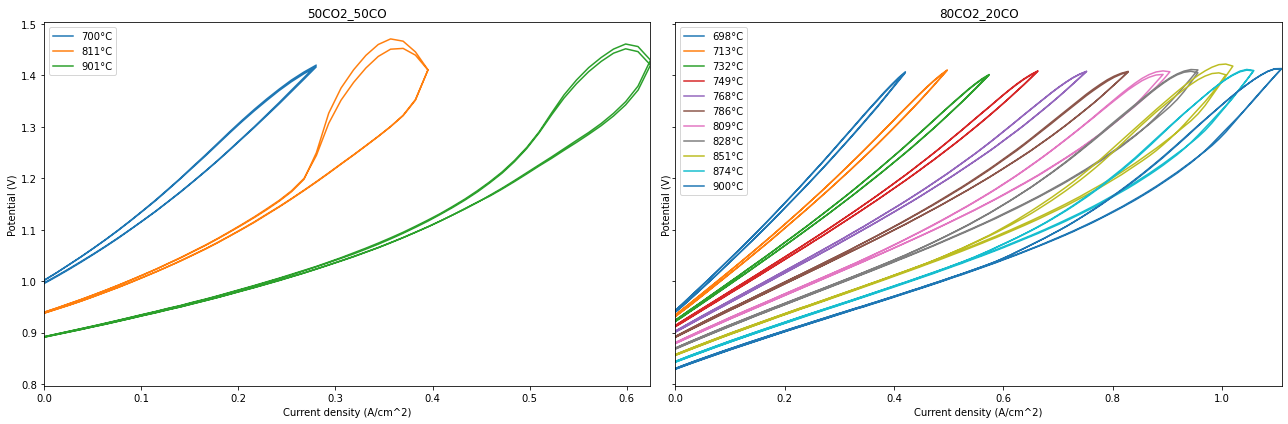

In [21]:
lr = LR() # instantiate linear regression to calculate ARS

# create empty columns to add vars of interest
df_list1['ocv (V)'] = 'NaN'; df_list2['ocv (V)'] = 'NaN'; df_list1['ars'] = 'NaN'; df_list2['ars'] = 'NaN' 
df_list1['cr14'] = 'NaN'; df_list2['cr14'] = 'NaN';

# Create figure
figure, axes = plt.subplots(nrows=1,ncols=2,figsize=[18,6],sharey=True)
# sns.lineplot(ax=axes[0],x='current_density',y='potential (V)',data=df_list1,hue='temp')#,linewidth=2,estimator=None,ci=None) ->
# simplest way but doesnt give desired plots

# Loop over datasets/temperatures and plot I/V curves
for i, n in enumerate(temp_names1): # loop over temperatures and plot separately: dataset 1
    dat = df_list1[df_list1.loc[:,'temp'] == n]
    ix = df_list1.loc[:,'temp'] == n
    axes[0].plot(dat['current_density'],dat['potential (V)'],label=n)
    axes[0].legend()
    axes[0].set_title(folder1[-11:-1])
    axes[0].set_xlabel('Current density (A/cm^2)')
    axes[0].set_ylabel('Potential (V)')
    axes[0].set_xlim([0,dat['current_density'].max()])
    
    # Calculate OCV (by taking mean of the Potential (V) values closest to y=0), add to df_list1
    y_0 = min(dat['current_density'], key=abs)
    ocv = dat.loc[dat.current_density == y_0,'potential (V)'].mean()
    df_list1['ocv (V)'].loc[ix] = ocv
    
    # Determine the current density at 1.4 V (take again the mean of values around 1.4)
    dat[dat['current_density'] == 1.4]
    v14 = np.logical_and(dat['potential (V)'] > 1.39, dat['potential (V)'] < 1.41)
    cr14 = dat.loc[v14,'current_density'].mean()
    df_list1['cr14'].loc[ix] = ocv
    
    # Calculate ARS by taking x and y values between 0.08>x<0.12 and do linear regression, get the slope
    i100 = np.logical_and(dat['current_density'] < 0.12, dat['current_density'] > 0.08)
    x = dat.loc[i100,'current_density']
    y = dat.loc[i100,'potential (V)']
    lr.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))
    df_list1['ars'].loc[ix] = float(lr.coef_)
    
    
for i, n in enumerate(temp_names2): # loop over temperatures and plot separately: dataset 2
    dat = df_list2[df_list2.loc[:,'temp'] == n]
    ix = df_list2.loc[:,'temp'] == n
    axes[1].plot(dat['current_density'],dat['potential (V)'],label=n)
    axes[1].legend()
    axes[1].set_title(folder2[-11:-1])
    axes[1].set_xlabel('Current density (A/cm^2)')
    axes[1].set_ylabel('Potential (V)')
    axes[1].set_xlim([0,dat['current_density'].max()])
    
    # Calculate OCV (by taking mean of the Potential (V) values closest to y=0), add to df_list1
    y_0 = min(dat['current_density'], key=abs)
    ocv = dat.loc[dat.current_density == y_0,'potential (V)'].mean()
    df_list2['ocv (V)'].loc[ix] = ocv
    
    # Determine the current density at 1.4 V (take again the mean of values around 1.4)
    dat[dat['current_density'] == 1.4]
    v14 = np.logical_and(dat['potential (V)'] > 1.39, dat['potential (V)'] < 1.41)
    cr14 = dat.loc[v14,'current_density'].mean()
    df_list2['cr14'].loc[ix] = ocv
    
    # Calculate ARS by taking x and y values between 0.08>x<0.12 and do linear regression, get the slope
    i100 = np.logical_and(dat['current_density'] < 0.12, dat['current_density'] > 0.08)
    x = dat.loc[i100,'current_density']
    y = dat.loc[i100,'potential (V)']
    lr.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))
    df_list2['ars'].loc[ix] = float(lr.coef_)
    
plt.tight_layout()
figure.savefig('IV_curves.pdf') # Save figure

In [22]:
# New DF with calculated values
df_list2.head()

,time (s),current (A),potential (V),current_density,temp,co2,co,ocv (V),ars,cr14
0,1.0,-0.000019,0.939422,-0.000024,698°C,80,20,0.94117,1.01533,0.94117
1,2.0,-0.000019,0.939422,-0.000024,698°C,80,20,0.94117,1.01533,0.94117
2,3.0,-0.000019,0.939422,-0.000024,698°C,80,20,0.94117,1.01533,0.94117
3,4.0,-0.000019,0.939612,-0.000024,698°C,80,20,0.94117,1.01533,0.94117
4,5.0,-0.000019,0.939612,-0.000024,698°C,80,20,0.94117,1.01533,0.94117


In [83]:
# Create df with desired format
df = pd.concat([df_list1,df_list2])
temps = df['temp'].unique()
results = pd.DataFrame(columns = ['CO2/%','CO/%','T/\N{DEGREE SIGN}C','OCV/V','ASR/ohm cm^2','J_1.4V/A cm^2']) 

for n, t in enumerate(temps):
    irow = df[df['temp']==t].iloc[0]
    results.loc[n,'CO2/%'] = irow['co2']
    results.loc[n,'CO/%'] = irow['co']
    results.loc[n,'T/\N{DEGREE SIGN}C'] = irow['temp'][:-2]
    results.loc[n,'OCV/V'] = round(irow['ocv (V)'],4)
    results.loc[n,'ASR/ohm cm^2'] = round(irow['ars'],4)
    results.loc[n,'J_1.4V/A cm^2'] = round(irow['cr14'],4)
results

,CO2/%,CO/%,T/°C,OCV/V,ASR/ohm cm^2,J_1.4V/A cm^2
0,50,50,700,0.9986,1.4458,0.9986
1,50,50,811,0.9384,0.7998,0.9384
2,50,50,901,0.8914,0.4369,0.8914
3,80,20,698,0.9412,1.0153,0.9412
4,80,20,713,0.9326,0.8665,0.9326
5,80,20,732,0.9224,0.7424,0.9224
6,80,20,749,0.9123,0.6551,0.9123
7,80,20,768,0.9017,0.5783,0.9017
8,80,20,786,0.8915,0.5073,0.8915
9,80,20,809,0.8794,0.4702,0.8794


In [80]:
# Export to one csv file, values per temperature
results.to_csv('results.csv', sep=',', mode='a', index=None)